## Resposta em frequência e margens de estabilidade de um sistema SISO

As **características da resposta em malha fechada** de um sistema SISO podem ser inferidas **a partir da análise da função de transferência em malha aberta**: 
$$L(s) = G(s) H(s) = K \frac{N(s)}{D(s)}$$
com:
*  $G(s)$ sendo a função de transferência equivalente ao canal direto;
*  $H(s)$ sendo a função de transferência equivalente ao canal de realimentação. 

Em particular, sabemos que a função de transferência em **malha fechada** é dada por: 
$$T(s) = \frac{G(s)}{1 + L(s)}$$

Assim, a condição necessária para que um valor de $s \in \mathbb{C}$ seja um **polo do sistema em malha fechada** é:
$$
1 + L(s) = 0 \quad \Rightarrow \quad 
|L(s)| = 1
\quad \text{e} \quad
\phase{L(s)} \equiv 180^\circ
$$

A análise da condição $\phase{L(s)} \equiv 180^\circ$ leva à construção do **lugar das raízes**. 

Veremos agora como a análise da resposta em frequência $L(\mathsf{j} \omega)$ para $\omega \geq 0$ pode nos fornecer informações acerca da resposta do sistema em malha fechada, podendo assim ser usada como critério de projeto de compensadores.

In [1]:
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np
import control as ct

In [2]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### 1. Visualizando $L(s)$ como uma função $\mathbb{C} \to \mathbb{C}$

Retornando à função de transferência do tipo $m=1$ do exemplo A-6-19 do livro: 
> OGATA, K. (2001) Modern Control Engineering, 4th ed., Pearson.

que visa representar um *piloto automático para o modo longitudinal (pitch) de um avião*:

\begin{align*}
    L(s) = G(s)H(s) = \frac{K(s+a)}{s(s-b)(s^2 + 2\zeta \omega_n s + \omega_n^2)} = K \frac{N(s)}{D(s)}
\end{align*}

Adotando $a=b=1$, $\zeta=0.5$ e $\omega_n=4$:

\begin{align*}
   L(s) = \frac{K(s+1)}{s(s-1)(s^2 + 4s + 16)}
\end{align*}

tem-se um zero em $z_1 = -1$ e quatro polos em $p_0=0$ (multiplicidade algébrica 1), $p_1=+1$ e $p_{2,3}=-2 \pm 2\sqrt{3} \mathsf{j}$.

Vimos que, nestas condições, a planta é *condicionalmente estável*, ou seja, é possível ter um comportamento estável em malha fechada com controlador *proporcional* ($K$) se, e somente se: $$23.32 < K < 35.68$$

In [3]:
zeros = np.array([-1])
poles = np.array([0, +1, -2 + (2j * np.sqrt(3)), -2 - (2j * np.sqrt(3))])

N = ct.tf(np.poly(zeros), [1])
D = ct.tf(np.poly(poles), [1])

L_0 = N/D
L_0

TransferFunction(array([1., 1.]), array([  1.,   3.,  12., -16.,   0.]))

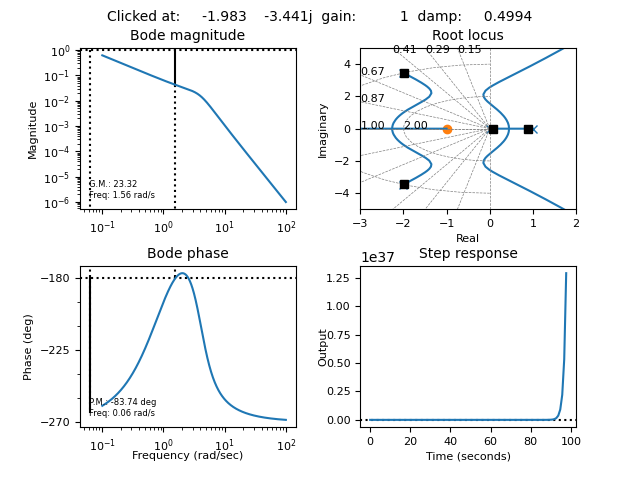

In [4]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_0, xlim_rlocus=(-3, 2), ylim_rlocus=(-5, 5),
            rlocus_grid=True)
plt.draw()  # desenhar a janela interativa

Os gráficos abaixo permitem visualizar $L(s)$ como uma função de uma variável complexa a valores complexos.

In [5]:
# Criando linhas de grade verticais no plano xy
x = np.linspace(0, 10.1, 1001)
y = np.linspace(-200, 200, 20000)

# Definindo os valores de alpha das cores das linhas de grade verticais
n = len(x)
ca = -np.log((np.linspace(1, n, n)-0.02)/n)
ca = ca/max(ca)

# Armazenando as linhas de grade verticais em listas
domain_lines = [xi + y * 1j for xi in x]

In [6]:
def plotL(K):
    # FTMA
    L = ct.tf(K * L_0)

    # Armazenando as imagens das linhas de grade verticais em listas
    image_lines = [L(line) for line in domain_lines]

    # Gráficos
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # Plotando as linhas de grade verticais no plano domínio
    for i in range(n):
        axes[0].plot(domain_lines[i].real, domain_lines[i].imag,
                    color=cp['yellow'], alpha=ca[i], linewidth=2.5)

    axes[0].plot(domain_lines[0].real, domain_lines[0].imag,
                color=cp['red'], linewidth=2.5)
    axes[0].plot([0, +1, -2, -2], [0, 0, -2*np.sqrt(3), +2*np.sqrt(3)], 'xk')
    axes[0].plot(-1, 0, 'ok', mfc='none')

    axes[0].set_title('Domínio')
    axes[0].set_xlabel('Re(s)')
    axes[0].set_ylabel('Im(s)')
    # axes[0].axhline(0, color='black', linewidth=0.5)
    # axes[0].axvline(0, color='black', linewidth=0.5)
    # axes[0].grid(color='gray', linestyle='--', linewidth=0.5)
    axes[0].set_xlim(-10, 10)
    axes[0].set_ylim(-10, 10)
    axes[0].set_aspect('equal', 'box')

    # Plotando a imagem das linhas de grade verticais após aplicação de L(s)
    for i in range(n):
        axes[1].plot(image_lines[i].real, image_lines[i].imag,
                    color=cp['yellow'], alpha=ca[i], linewidth=2.5)

    axes[1].plot(image_lines[0].real, image_lines[0].imag,
                color=cp['red'], linewidth=2.5)
    axes[1].plot(-1, 0, 'ok')

    axes[1].set_title('Contra-domínio')
    axes[1].set_xlabel('Re(L(s))')
    axes[1].set_ylabel('Im(L(s))')
    # axes[1].axhline(0, color='black', linewidth=0.5)
    # axes[1].axvline(0, color='black', linewidth=0.5)
    # axes[1].grid(color='gray', linestyle='--', linewidth=0.5)
    axes[1].set_xlim(-2, 1)
    axes[1].set_ylim(-1.5, 1.5)
    axes[1].set_aspect('equal', 'box')

    plt.tight_layout()
    plt.show()

Em particular, adotando $K = 30$, valor para o qual a resposta em malha fechada é estável:

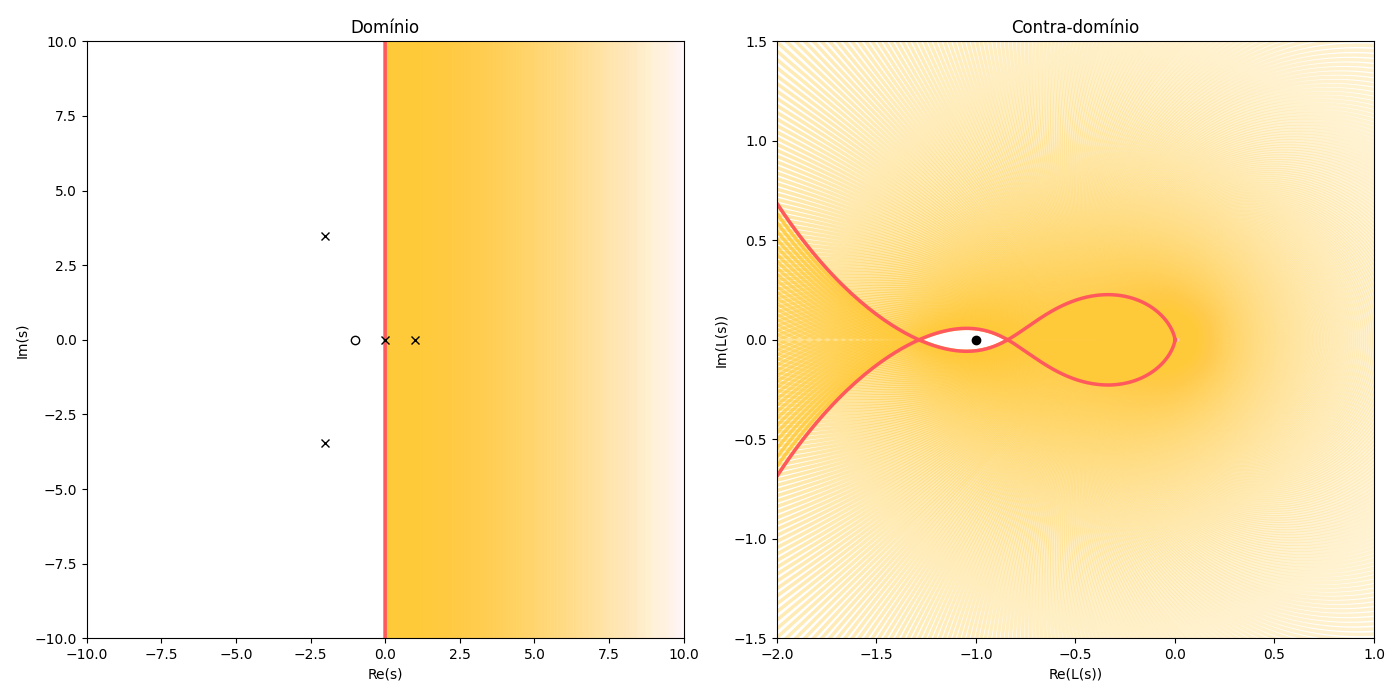

In [7]:
plotL(30)

As curvas destacadas em vermelho correspondem, no domínio, ao eixo imaginário $\mathsf{j} \omega$ e, no contra-domínio, à imagem de $L(\mathsf{j} \omega)$. 

Como se pode observar, apesar de a **função de transferência de malha aberta** ter um polo com $\text{Re}(s)>0$, **não há nenhum polo instável em malha fechada** uma vez que para nenhum $s \in \mathbb{C}^+$ (número complexo no semi-plano direito) a condição $L(s) = -1$ é satisfeita.

Para $K = 20$, fora do intervalo que garante estabilidade em malha fechada:

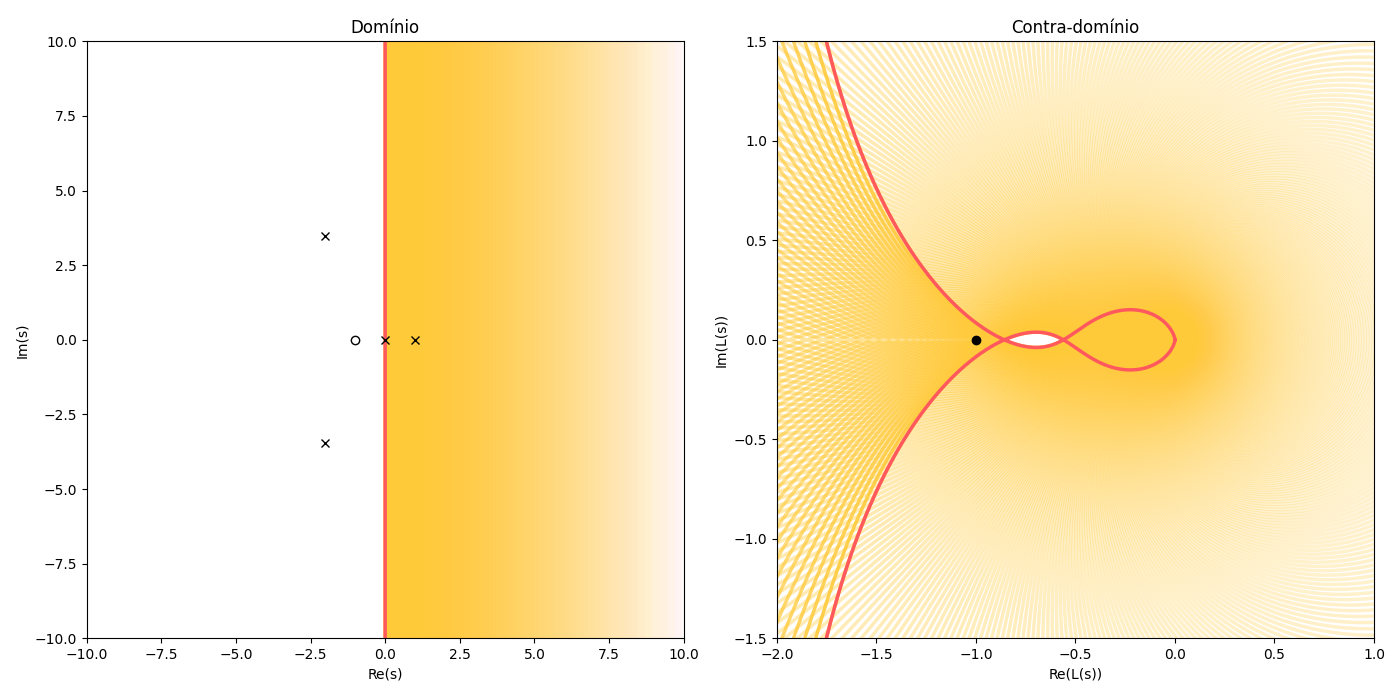

In [8]:
plotL(20)

Para $K = 50$, também fora do intervalo que garante estabilidade em malha fechada:

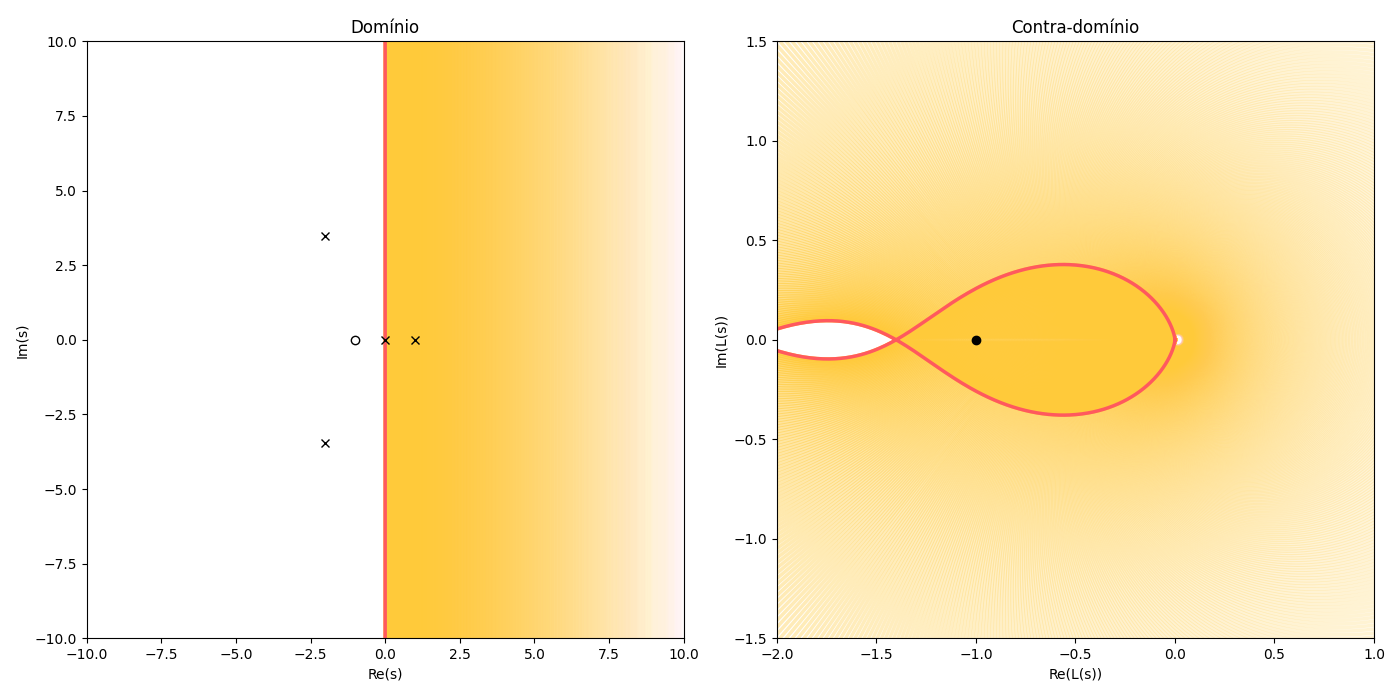

In [9]:
plotL(50)

Em outras palavras, o sistema será **instável em malha fechada** se, e somente se, ponto $-1$ estiver contido na imagem do semi-plano complexo direito por $L(s)$, ou seja, se existir $s \in \mathbb{C}^+$ tal que $L(s) = -1$.

Considerando agora o compensador PID anteriormente projetado para esta planta:

In [10]:
τ_i = 12.0
τ_d = 3.6667
G_c_PID = 15 * ct.tf([τ_d, 1, 1/τ_i], [1, 0])
G_c_PID

TransferFunction(array([55.0005, 15.    ,  1.25  ]), array([1, 0]))

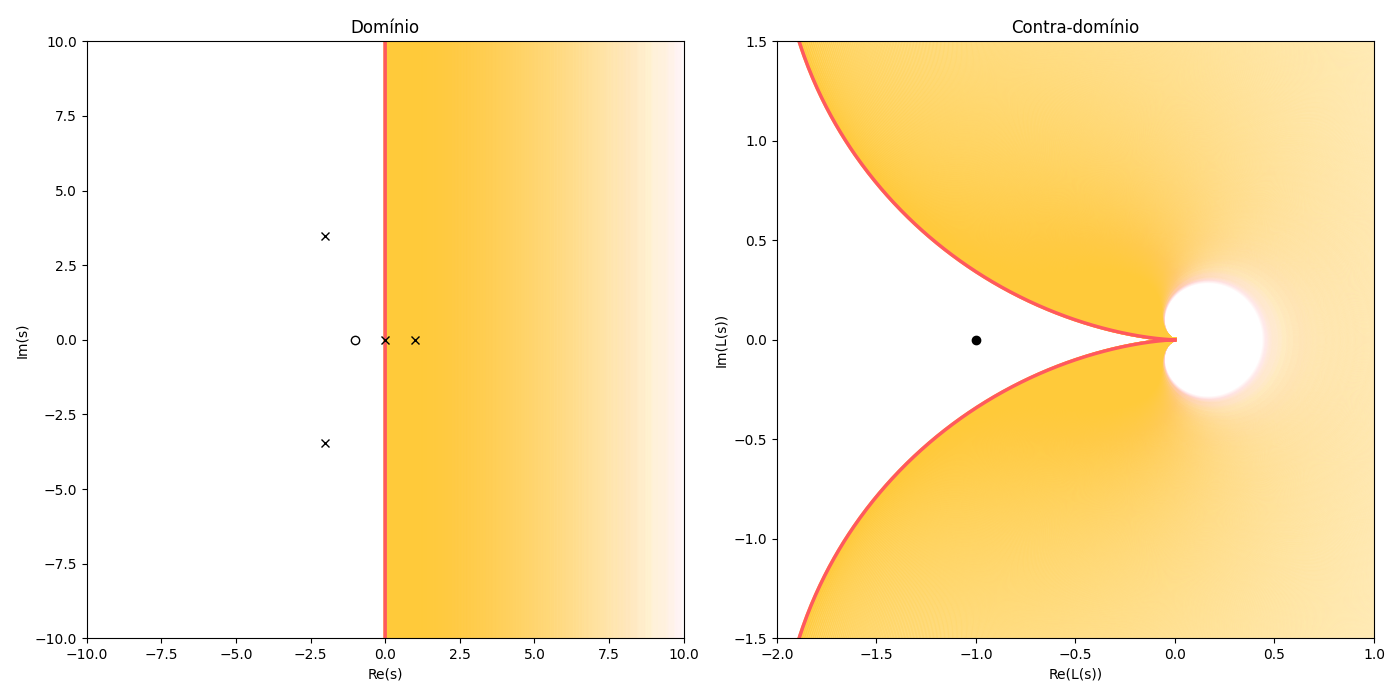

In [11]:
plotL(G_c_PID)

Um dos indícios de que o sistema com compensador PID tem melhor desempenho em termos de estabilidade é o fato de que o ponto $-1$ está "mais distante" da imagem do semi-plano direito por $L(s)$, ou seja, de alguma forma temos uma "margem de segurança" maior para que diferenças entre planta e modelo não levem a uma resposta instável do sistema real em situações em que se esperaria estabilidade.

### 2. Diagramas de Bode e margens de estabilidade

Uma das formas que conhecemos para visualizar $L(\mathsf{j} \omega), \omega > 0$ é por meio dos *diagramas de Bode* que representam:

* $20 \log_{10}|L(\mathsf{j} \omega)|$ (em escala dB) vs. $\omega$ (em escala logaritimica)
* $\phase{L(\mathsf{j} \omega)}$ (em graus) vs. $\omega$ (em escala logaritimica)

Para a função do exemplo, considerando $K = 30$:

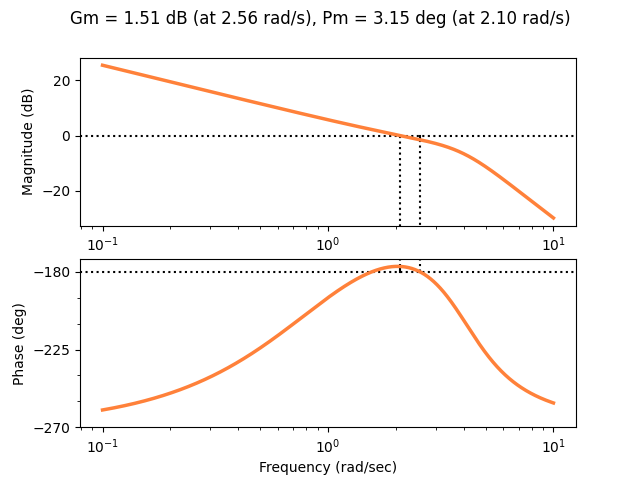

In [12]:
plt.figure()
L30_m, L30_φ, L30_ω = ct.bode_plot(
    30 * L_0, color=cp['orange'], linewidth=2.5, dB=True, margins=True, omega_limits=(1e-1, 10), initial_phase=-270)

Considerando agora a presença do compensador PID projetado para esta planta:

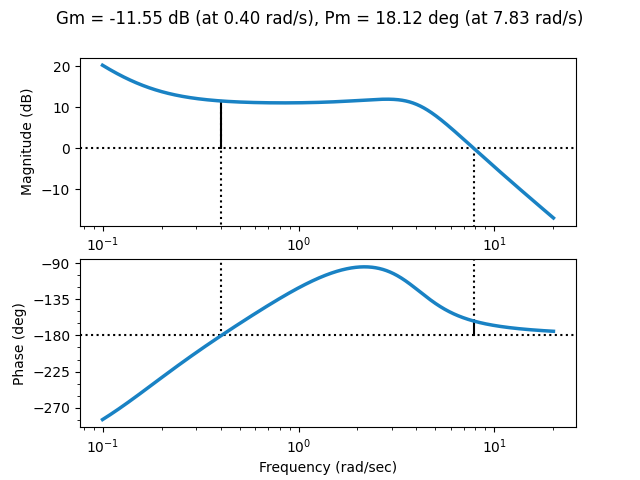

In [13]:
plt.figure()
Lc_m, Lc_φ, Lc_ω = ct.bode_plot(
    G_c_PID * L_0, color=cp['blue'], linewidth=2.5, dB=True, margins=True, omega_limits=(1e-1, 20), initial_phase=-360)

Se estivessemos em uma situação de **ganho crítico**, o sistema teria polos sobre o eixo imaginário, ou seja, *para algum $\omega > 0$*:
$$
L(\mathsf{j} \omega) = -1 
\quad \Rightarrow \quad 
20 \log_{10} |L(\mathsf{j} \omega)| = 0
\quad \text{e} \quad
\phase{L(\mathsf{j} \omega)} \equiv 180^\circ
$$
Em outras palavras, para algum valor de $\omega$ deveríamos ter **simultaneamente** o gráfico de magnitude cruzando o limiar de 0 dB e o gráfico de fase cruzando o limiar de $- 180^\circ$.

Nos exemplos mostrados, seja adotando um ganho proporcional $K = 30$ ou o compensador PID, a resposta do sistema em malha fechada é estável, o que nos permite identificar:
* $\omega_\phi$: frequência de ganho crítico (*gain crossover*), para a qual $20 \log_{10} |L(\mathsf{j} \omega_\phi)| = 0 \ \text{dB}$ ;
* $\omega_c$: frequência de fase crítica (*phase crossover*), para a qual $\phase{L(\mathsf{j} \omega_c)} = -180^\circ$.

Estaremos em uma situação de ganho crítico, portanto, se $\omega_\phi = \omega_c$. Caso contrário, dispomos de **margens de estabilidade** para *variação de ganho* ou *atrasos em fase* sem que a estabilidade nominal do sistema esteja comprometida. Definimos assim as margens de ganho e fase:

* **Margem de ganho (GM)**:
$$
\text{GM} = \frac{1}{|L(\mathsf{j} \omega_c)|}
\qquad \text{ou} \qquad 
\text{GM(dB)} = - 20 \log_{10} |L(\mathsf{j} \omega_c)|
$$
* **Margem de fase (PM)**:
$$
\text{PM} = 180^\circ + \phase{L(\mathsf{j} \omega_\phi)}
\qquad \text{com} \qquad
\phase{L(\mathsf{j} \omega_\phi)} < 0
$$


Outra forma forma de avaliar a estabilidade é por meio da resposta em frequência da **função de sensibilidade**:
$$
S(\mathsf{j} \omega) = \frac{1}{1 + L(\mathsf{j} \omega)}
$$
Em particular, o valor de $\omega = \omega_s$ para o qual $|S(\mathsf{j} \omega)|$ é máximo, corresponde ao ponto do eixo imaginário cuja imagem por $L(s)$ está o mais próximo possível do ponto crítico $-1$, uma vez que o valor $|1 + L(\mathsf{j} \omega_s)|$ será mínimo.

Usando a função `stability_margins` podemos verificar as margens de estabilidade quando adotamos um ganho proporcional $K = 30$:

In [14]:
L30_margins = ct.stability_margins(30 * L_0)  
L30_margins  # GM, PM, 1/|S(ω_s)|, ω_c, ω_φ, ω_s

(1.189488614614216,
 3.147882769519498,
 0.054653630356224024,
 2.5615528128088303,
 2.095107510553515,
 2.1100125520021544)

In [15]:
20 * np.log10(L30_margins[0])  # GM(dB)

1.5072057894432662

In [16]:
- 20 * np.log10(L30_margins[2])  # S(ω_s)(dB)

25.24761969667892

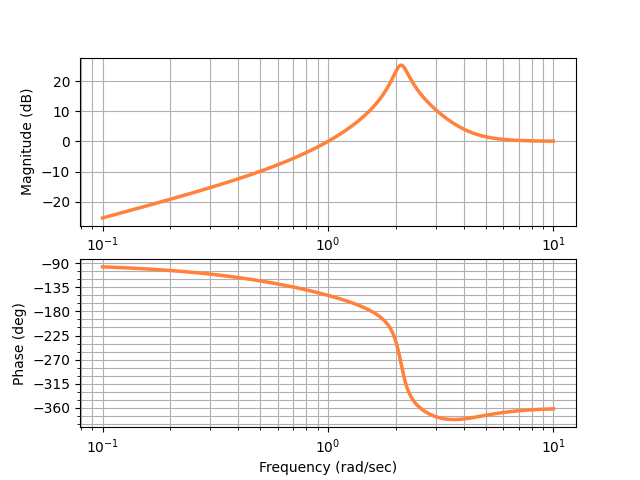

In [14]:
# Diagrama de Bode para função de sensibilidade
plt.figure()
_, _, _ = ct.bode_plot(
    1/(1 + 30 * L_0), color=cp['orange'], linewidth=2.5, dB=True, omega_limits=(1e-1, 10))

Analogamente, para o caso em que se considera o compensador PID:

In [15]:
Lc_margins = ct.stability_margins(G_c_PID * L_0)  
Lc_margins  # GM, PM, 1/|S(ω_s)|, ω_c, ω_φ, ω_s

(0.2645487760186127,
 18.119163493509973,
 0.29394200151272165,
 0.4036279810266267,
 7.825590980443346,
 8.233391980099546)

In [16]:
20 * np.log10(Lc_margins[0])  # GM(dB)

-11.549884869339841

In [20]:
- 20 * np.log10(Lc_margins[2])  # S(ω_s)(dB)

10.634767058955358

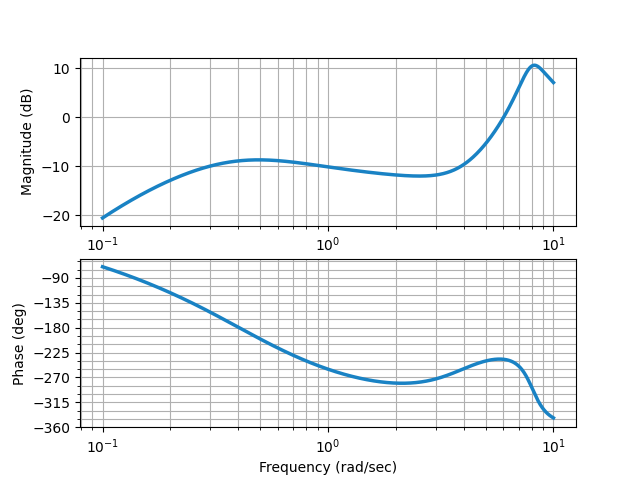

In [17]:
# Diagrama de Bode para função de sensibilidade
plt.figure()
_, _, _ = ct.bode_plot(
    1/(1 + G_c_PID * L_0), color=cp['blue'], linewidth=2.5, dB=True, omega_limits=(1e-1, 10))